In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
#Reading the csv file into the dataFrame
df = pd.read_csv('/Users/Manan/churn/BankCustomers.csv')
df.head(7)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0


In [3]:
#To know some useful details
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Data Preprocessing

In [5]:
#to know the number of rows and columns
df.shape

(10000, 14)

In [6]:
df = df.drop(labels=['RowNumber','CustomerId','Surname'],axis=1)

In [7]:
df.info()  #So, after removing unneccasry columns, we have to predict whether the customer will churn or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
df.isnull().sum()  #So, no null or na values in this dataset

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
(df['Balance']==0).value_counts()

False    6383
True     3617
Name: Balance, dtype: int64

In [10]:
(df['EstimatedSalary']==0).value_counts()

False    10000
Name: EstimatedSalary, dtype: int64

In [11]:
#Replacing zeros to the mean values of Balance column
nonzero_mean = df[ df['Balance'] != 0 ].mean()
df.loc[ df['Balance'] == 0, "Balance" ] = nonzero_mean['Balance']

In [12]:
df['Balance'].head(7)

0    119827.493793
1     83807.860000
2    159660.800000
3    119827.493793
4    125510.820000
5    113755.780000
6    119827.493793
Name: Balance, dtype: float64

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Geography']=le.fit_transform(df['Geography'])
df['Gender']=le.fit_transform(df['Gender'])

In [14]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,119827.493793,1,1,1,101348.88,1
1,608,2,0,41,1,83807.860000,1,0,1,112542.58,0
2,502,0,0,42,8,159660.800000,3,1,0,113931.57,1
3,699,0,0,39,1,119827.493793,2,0,0,93826.63,0
4,850,2,0,43,2,125510.820000,1,1,1,79084.10,0


In [15]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [16]:
#percentage to bank customer leaving
retained = df[df['Exited']==0].shape[0]
leaved = df[df['Exited']==1].shape[0]
print(leaved/(leaved+retained)*100,"% customers leaved the bank")
print(retained/(leaved+retained)*100,"% customers stayed the bank")

20.369999999999997 % customers leaved the bank
79.63 % customers stayed the bank


# Exploratory Data Analysis

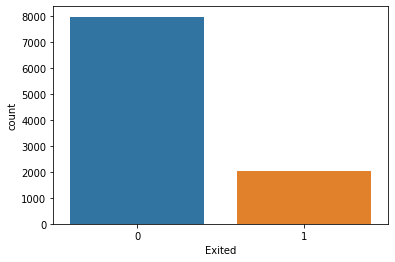

In [17]:
sb.countplot(df['Exited'])

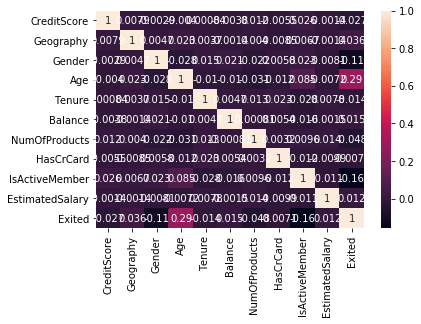

In [18]:
sb.heatmap(df.corr(),annot=True)

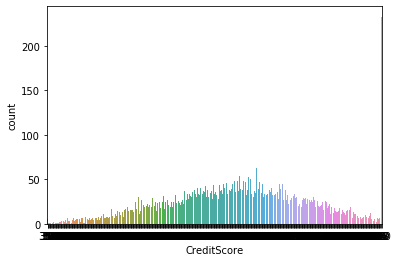

In [19]:
sb.countplot(df['CreditScore'])

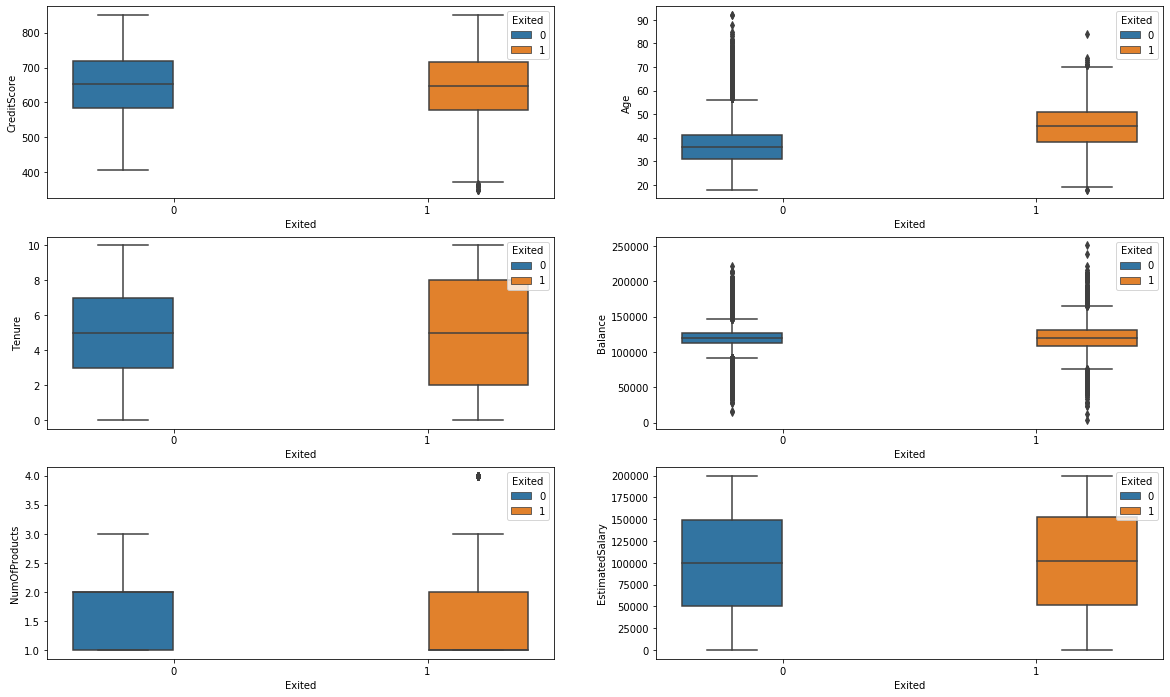

In [20]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sb.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sb.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sb.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sb.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sb.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sb.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

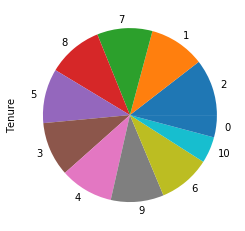

In [21]:
df['Tenure'].value_counts().plot(kind="pie")

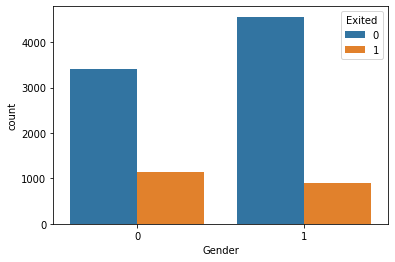

In [22]:
sb.countplot(x='Gender',hue='Exited',data=df)  #here 0 is Female and 1 is Male

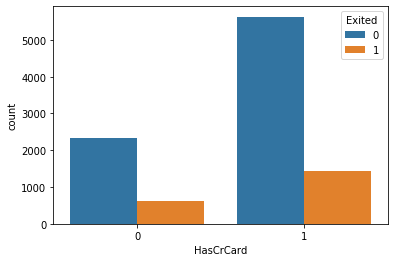

In [23]:
sb.countplot(x='HasCrCard',hue='Exited',data=df) 
#As we can see, the person with credit cards has not leaved the bank

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F4B11C8A58>,
      dtype=object)

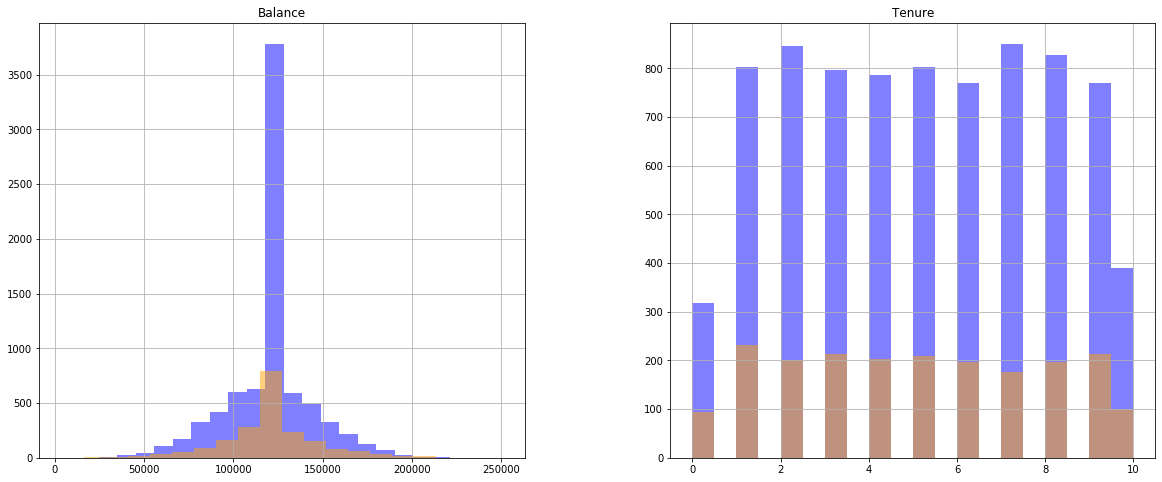

In [24]:
features = ['Tenure','Balance']
fig, ax=plt.subplots(1,2,figsize=(20,8))
df[df.Exited==0][features].hist(bins=20,color='blue',alpha=0.5,ax=ax)
df[df.Exited==1][features].hist(bins=20,color='orange',alpha=0.5,ax=ax)

#Customers with Balance between 10K and 15K in range have stayed
#Customers with tenure 1 to 9 have stayed

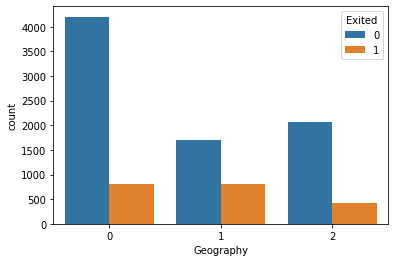

In [25]:
sb.countplot(x='Geography',hue='Exited',data=df) # means in Germany, the customer stayed with bank
#we can say that, the customers is France have leaved the bank

# Feature Engineering

In [26]:
df['CreditScoreGivenAge'] = df.CreditScore/(df.Age)

# Data Modeling

(array([6347.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1653.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

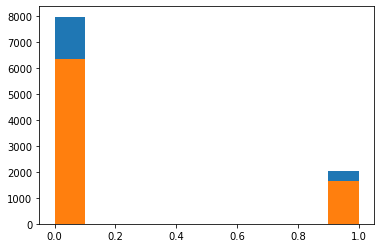

In [27]:
X = df.drop(labels=['Exited'],axis=1)
Y = df['Exited']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=40)
plt.hist(Y)
plt.hist(ytrain)  #To know the sampling of training set with actual data

In [28]:
xtrain.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScoreGivenAge
4318,673,1,0,77,10,76510.52,2,0,1,59595.66,8.740260
471,703,0,1,37,1,149762.08,1,1,0,20629.40,19.000000
9656,696,1,1,32,4,84421.62,1,0,1,52314.71,21.750000
8243,825,0,1,29,3,148874.01,2,0,1,71192.82,28.448276
9984,602,1,1,35,7,90602.42,2,1,1,51695.41,17.200000


In [29]:
#Scaling the xtrain and xtest to same place values using StandardScaler
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

F:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The accuracy of model is 0.828
The precion score of model is 0.6886792452830188
The recall of model is 0.19010416666666666


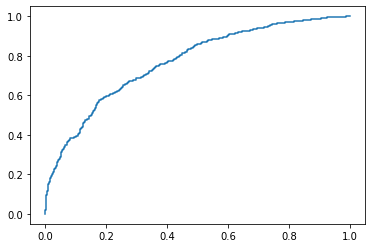

In [30]:
#So, we try different algorithm to find the best accuracy.
#First we will use Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
print("The accuracy of model is {}".format(accuracy_score(ytest,pred)))
print("The precion score of model is {}".format(precision_score(ytest,pred)))
print("The recall of model is {}".format(recall_score(ytest,pred)))

#So, with logistic regression, we are getting 82.4% accuracy

confusion_matrix(ytest,pred)
import sklearn.metrics as m
# calculate the fpr and tpr for all thresholds of the classification
probs = lr.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = m.roc_curve(ytest, preds)
roc_auc = m.auc(fpr, tpr)
plt.plot(fpr,tpr,roc_auc)

F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The accuracy of model is 0.868
The precion score of model is 0.780373831775701
The recall of model is 0.4348958333333333


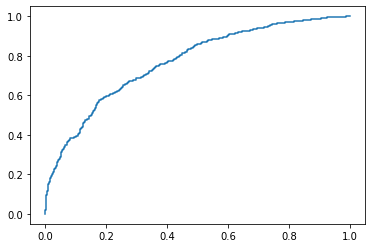

In [31]:
# Now using Random Forest classifier, we will predict accuracy of model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=10,max_depth=9)
model = rf.fit(xtrain,ytrain)
pred = model.predict(xtest)

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
print("The accuracy of model is {}".format(accuracy_score(ytest,pred)))
print("The precion score of model is {}".format(precision_score(ytest,pred)))
print("The recall of model is {}".format(recall_score(ytest,pred)))

#So, with logistic regression, we are getting 86.1% accuracy
confusion_matrix(ytest,pred)
import sklearn.metrics as m
# calculate the fpr and tpr for all thresholds of the classification
probs = lr.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = m.roc_curve(ytest, preds)
roc_auc = m.auc(fpr, tpr)
plt.plot(fpr,tpr,roc_auc)

F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change 

The accuracy of model is 0.868
The precion score of model is 0.780373831775701
The recall of model is 0.4348958333333333
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1616
           1       0.78      0.43      0.56       384

    accuracy                           0.87      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.86      0.87      0.85      2000



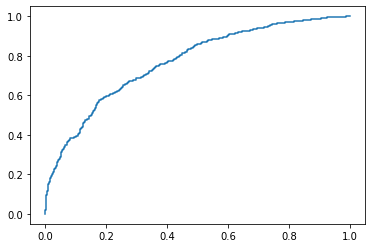

In [32]:
#using adaboost will predict the accuracy
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
abc = AdaBoostClassifier(RandomForestClassifier(max_depth =3),n_estimators=20)
model3 = abc.fit(xtrain,ytrain)
pred = model.predict(xtest)

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report
print("The accuracy of model is {}".format(accuracy_score(ytest,pred)))
print("The precion score of model is {}".format(precision_score(ytest,pred)))
print("The recall of model is {}".format(recall_score(ytest,pred)))

import sklearn.metrics as m
# calculate the fpr and tpr for all thresholds of the classification
probs = abc.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = m.roc_curve(ytest, preds)
roc_auc = m.auc(fpr, tpr)

print(m.classification_report(ytest,pred))
import sklearn.metrics as m
# calculate the fpr and tpr for all thresholds of the classification
probs = lr.predict_proba(xtest)
preds = probs[:,1]
fpr, tpr, threshold = m.roc_curve(ytest, preds)
roc_auc = m.auc(fpr, tpr)
plt.plot(fpr,tpr,roc_auc)

<BarContainer object of 11 artists>

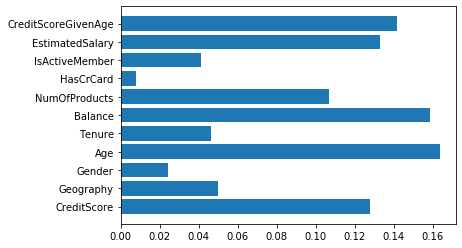

In [33]:
plt.barh(X.columns,model3.feature_importances_)

In [34]:
import pickle
pickle.dump(rf,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(criterion="entropy",random_state=40,n_estimators=30)
from sklearn.model_selection import GridSearchCV
tp = {"max_depth":[2,3,4,5,6,8,9,10,11,12,13,14,15]}
cv = GridSearchCV(rf2,tp,scoring="accuracy",cv=4)
cvmodel=cv.fit(xtrain,ytrain)
md = cvmodel.best_params_['max_depth']
from sklearn.ensemble import RandomForestClassifier
rfc1 = RandomForestClassifier(criterion="entropy",random_state=40,max_depth=md,n_estimators=30)
model2 = rfc1.fit(xtrain,ytrain)
pred = model.predict(xtest)

from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report
print("The accuracy of model is {}".format(accuracy_score(ytest,pred)))
print("The precion score of model is {}".format(precision_score(ytest,pred)))
print("The recall of model is {}".format(recall_score(ytest,pred)))
print(md)  # md =12

print(classification_report(ytest,pred))

The accuracy of model is 0.8705
The precion score of model is 0.7880184331797235
The recall of model is 0.4453125
12
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1616
           1       0.79      0.45      0.57       384

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.86      2000

